In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

dim de x: (100, 2)
dim de y: (100, 1)


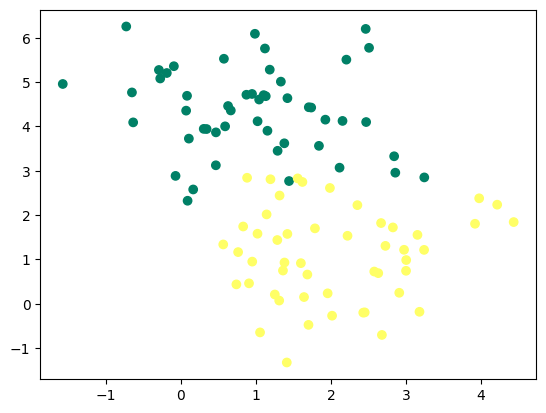

In [4]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                    random_state=0)


y=y.reshape((y.shape[0],1))
print('dim de x:',X.shape)
print('dim de y:',y.shape)
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

In [5]:
def initialisation(X):
    W= np.random.randn(X.shape[1],1)
    b= np.random.rand(1)
    return(W,b)

In [6]:
W,b=initialisation(X)
W.shape

(2, 1)

In [7]:
W,b=initialisation(X)
b.shape

(1,)

In [8]:
def model(X,W,b):
    Z= X.dot(W)+b
    A= 1/(1 +np.exp(-Z))
    print(A)
    return A


In [9]:
A=model(X,W,b)
A.shape

(100, 1)

In [10]:
def log_loss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [11]:
def gradients(A,X,y):
    dw= 1/ len(y)* np.dot(X.T,A-y)
    db= 1/ len(y)* np.sum(A-y)
    return(dw,db)

In [12]:
dw,db=gradients(A,X,y)
db

0.453358698419322

In [15]:
def update(dw,db,W,b,learning_rate):
    W= W-learning_rate * dw
    b= b-learning_rate * db
    return(W,b)

In [21]:
def predict(X,W,b):
    A=model(X,W,b)
    return A>=0.5

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
def arificial_neuron(X,y,learning_rate=0.1,n_inter=100):
    #intialitaion le b
    W,b = initialisation(X)
    Loss = []
    for i in range(n_inter):
        A=model(X,W,b)
        Loss.append(log_loss(A,y))
        dw,db=gradients(A,X,y)
        W,b=update(dw,db,W,b,learning_rate)
    y_pred=predict(X,W,b)
    print(accuracy_score(y,y_pred))
        
    plt.plot(Loss)
    plt.show()
    
    return(W,b)


0.92


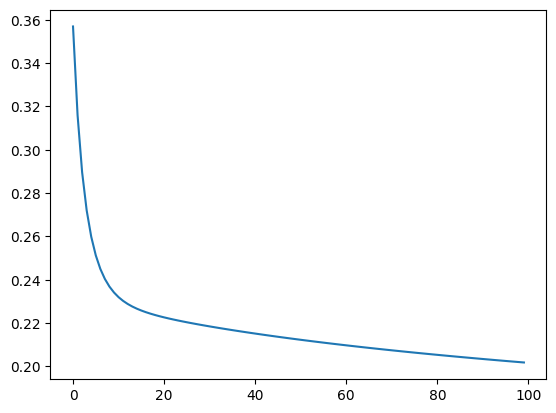

In [26]:
 arificial_neuron(X,y)

In [27]:
W,b


(array([[0.53764912],
        [0.99014483]]),
 array([0.68823342]))

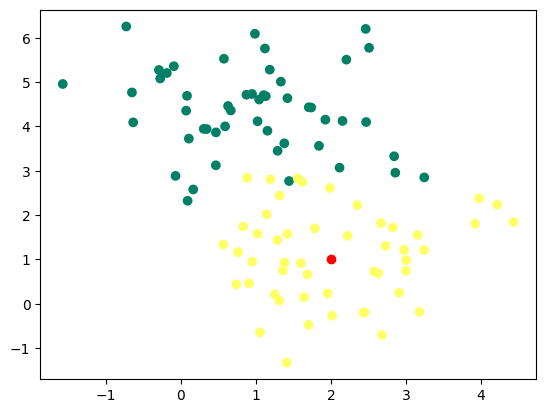

In [28]:
new_plant= np.array([2,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.show()